# Plotting with pandas exercises 

This exerice session is split in three parts, with difficulty slightly eincreasing with each part. 

## Part 1

We start with an abstract dataset containing four columns a, b, c and d filled with numerical data. Your task will be to replicate plots displayed right after  exercise descriptions.

We start by importing pandas and instructing the iPython notebook to display plots directly in the notebook

In [114]:
import pandas as pd
%matplotlib inline

Let's load the dataset from a csv file and getting some basic information about the dataframe.

In [115]:
df = pd.read_csv('/Users/grufino/github/pandas_matplotlib/df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       500 non-null    float64
 1   b       500 non-null    float64
 2   c       500 non-null    float64
 3   d       500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [116]:
df.head()

,a,b,c,d
0,0.336272,0.325011,0.001020,0.401402
1,0.980265,0.831835,0.772288,0.076485
2,0.480387,0.686839,0.000575,0.746758
3,0.502106,0.305142,0.768608,0.654685
4,0.856602,0.171448,0.157971,0.321231


### Exercise 1

Recreate this scatter plot of b vs a. Note the color and size of the points. Also note the figure size. See if you can figure out how to stretch it in a similar fashion.

<AxesSubplot:xlabel='b', ylabel='a'>

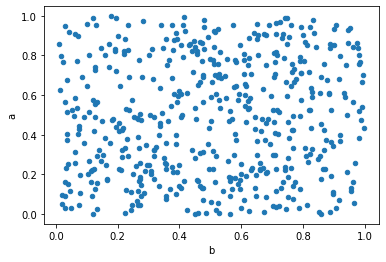

In [117]:
df.plot.scatter(x='b', y='a')

### Exercise 2

Create a histogram of the 'a' column.

array([[<AxesSubplot:title={'center':'a'}>]], dtype=object)

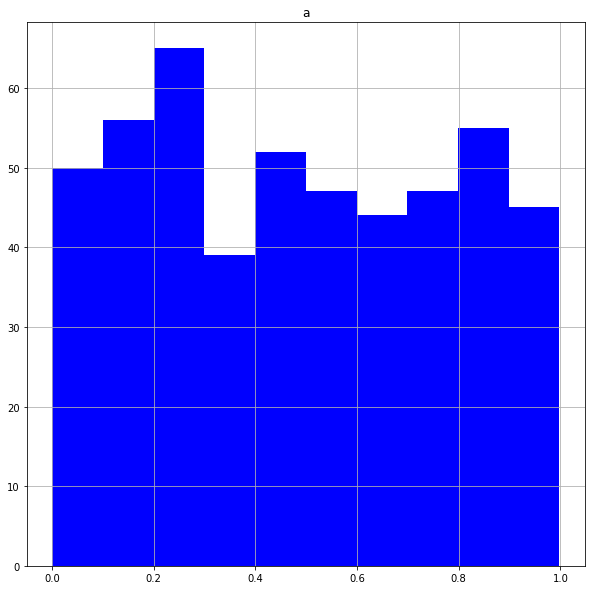

In [118]:
df.hist(column='a',figsize=(10,10),color="blue")

### Exercise 3

Create a boxplot comparing the a and b columns.

<AxesSubplot:>

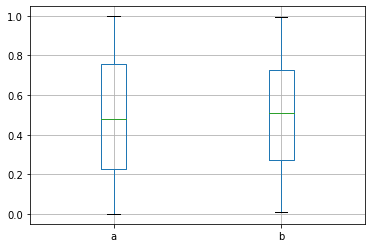

In [119]:
df.boxplot(column=['a', 'b'])

## Part 2

In this part we analyze dataset with TIOBE programming community index, which is a measure of popularity of programming languages, created and maintained by the TIOBE Company based in Eindhoven, the Netherlands.

In [120]:
url = 'https://raw.githubusercontent.com/evdoks/data_science/' \
      'master/data/tiobe_language_index.csv'
     
        
def strip_percentage_sign(x):
    return float(x.strip('%'))

progs = pd.read_csv(url,
                   index_col=0,
                   converters={'Percentage': strip_percentage_sign},
                   delimiter=',')
progs.head()

,Programming Language,Percentage
Rating,,
1,Java,14.493
2,C,6.848
3,C++,5.723
4,Python,4.333
5,C#,3.530


### Exercise 4

Create a line plot with  all languages listed on x axis and percentage on on y axis. Make sure that language names are readable on the plot's axis x.

Hint: use `x` and `y` arguments for specifying which collumns correspond to which axis; use `xticks` argument to make sure that all languages are listed on x axis.

<AxesSubplot:xlabel='Programming Language'>

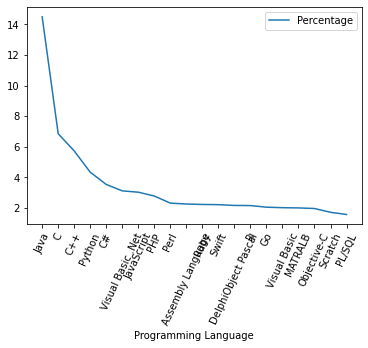

In [121]:
progs.plot(x='Programming Language', y='Percentage', xticks=range(len(progs.index)),
                rot=65)

### Exercise 5

Create a bar plot with top 10 languages listed on x axis and percentage on on y axis. Make sure that language names are readable on the plot's axis x.

Hint: use slicing notation to restrict the plot to 10 top languages.

<AxesSubplot:xlabel='Programming Language'>

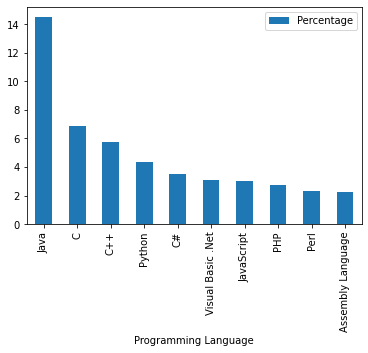

In [122]:
progs[:10].plot.bar(x='Programming Language', y='Percentage')

### Exercise 6

Create a pie chart for all languages and their percentages. Make sure that 
- language names are displayed next to the 'pie'
- no legend is shown

Hint: use `label` argument that lists all values (as Series) to be used aslabels of 'pie pieces'

<AxesSubplot:ylabel='Percentage'>

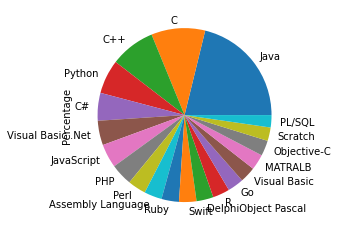

In [123]:
progs.plot(kind='pie',x='Programming Language', y='Percentage', legend=False, labels=progs['Programming Language'])

## Part 3

In this section we get back to the diamonds use case from the lecture.

### Exercise 7

Create a scatterplot for diamonds dataset with 'carat' as X axis and 'price' as Y axis and data points colored according to the 'color' attribute.

You may use following colors (#rrggbb is an RGB notation for colors):
- D: #ffebe6
- E: #ffc2b3
- F: #ff9980
- G: #ff704d
- H: #ff471a
- I: #e62e00
- J: #b32400
    
Some facts about diamond colors: http://www.lumeradiamonds.com/diamond-education/diamond-color

<AxesSubplot:xlabel='carat', ylabel='price'>

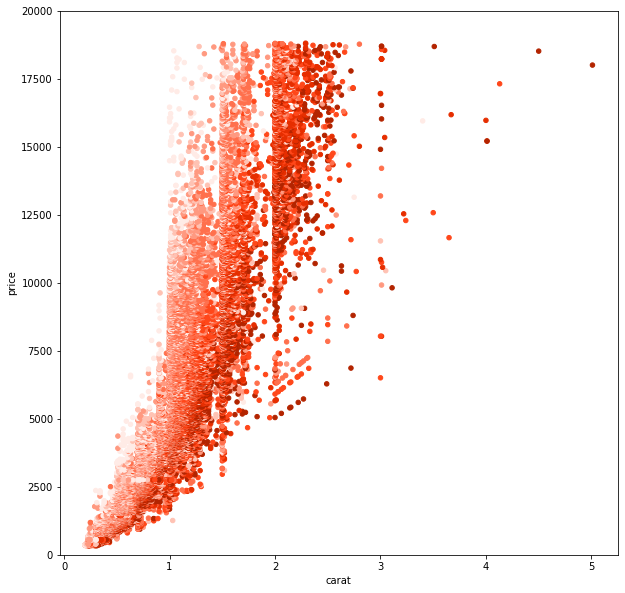

In [128]:
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/' \
      'master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds.head()
def diamond_color(x):
    color_map = {   'D': '#ffebe6',
        'E': '#ffc2b3',
        'F': '#ff9980',
        'G': '#ff704d',
        'H': '#ff471a',
        'I': '#e62e00',
        'J': '#b32400'
    }
    return color_map[x]

diamonds.plot(kind="scatter",     # Create a scatterplot
              x="carat",          # Put carat on the x axis
              y="price",          # Put price on the y axis
              figsize=(10,10),
              ylim=(0,20000),
              c=diamonds.color.apply(diamond_color))